In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
biopsy = pd.read_csv("biopsy.csv", delimiter=";")
biopsy.info()
print(biopsy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      699 non-null    int64  
 1   V1      699 non-null    int64  
 2   V2      699 non-null    int64  
 3   V3      699 non-null    int64  
 4   V4      699 non-null    int64  
 5   V5      699 non-null    int64  
 6   V6      683 non-null    float64
 7   V7      699 non-null    int64  
 8   V8      699 non-null    int64  
 9   V9      699 non-null    int64  
 10  class   699 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 60.2+ KB
          ID  V1  V2  V3  V4  V5    V6  V7  V8  V9      class
0    1000025   5   1   1   1   2   1.0   3   1   1     benign
1    1002945   5   4   4   5   7  10.0   3   2   1     benign
2    1015425   3   1   1   1   2   2.0   3   1   1     benign
3    1016277   6   8   8   1   3   4.0   3   7   1     benign
4    1017023   4   1   1   3   2   1.0   

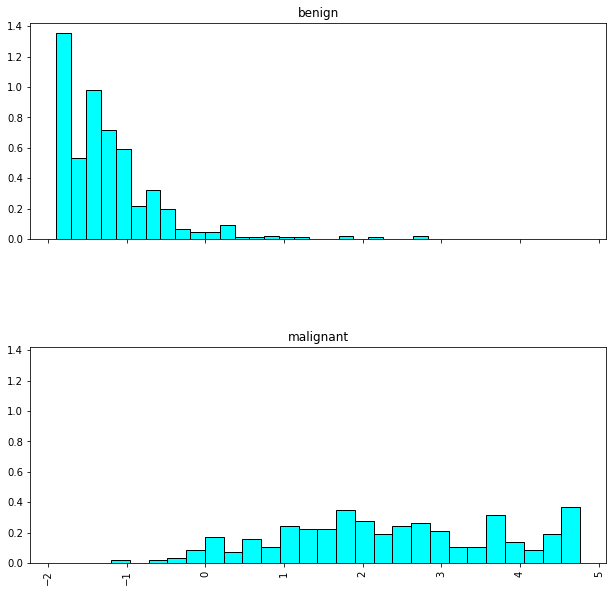

/home/rubenbrouwers/.local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/rubenbrouwers/.local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


predicted  benign  malignant  total
actual                             
benign        448         10    458
malignant      33        208    241
total         481        218    699

In [16]:
X = biopsy.loc[:, ["V1", "V2", "V3"]].copy()
y = biopsy['class']

# This is how you make an object in py
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)

lda.classes_  # values of the dependent variable
lda.coef_  # coefficients of the discriminant function
lda.priors_  # probability of an observation coming from a particular group
lda. explained_variance_ratio_  # how much of the variance is explained
# by each of the discriminant functions (only useful when there are several 
# # discriminant functions

# map the independent variables based on the discriminant functions of the model to their N 
# # discriminant values
LD = lda.transform(X)

# combine with the original dependent variable
LD_df= pd.DataFrame(zip(LD[:,0], biopsy['class']), columns=['LD1','Target'])

LD_df.hist(column=['LD1'], by='Target', bins=25, density=True, edgecolor='black' ,color='cyan', sharex=True, sharey=True, figsize=(10,10), layout=(2,1))
fig, ax = plt.subplots(figsize=(10,5))
LD_df['LD1'][LD_df['Target'] == 'benign'].hist(ax=ax, bins=25, density = True,edgecolor='black', color='green', label='benign')
LD_df['LD1'][LD_df['Target'] == 'malignant'].hist(ax=ax, bins=25, density = True,edgecolor='black', color='red', alpha=0.7, label='malignant')
ax.legend()
ax.grid(False)
plt.show()

lda.predict([[5,6,8]])
# output: array(['malignant'], dtype='<U9’)
lda.predict_proba([[5,6,8]])
# output: array([[0.0080211, 0.9919789]])

lda.predict(X)
# output:  ['benign' 'benign' 'benign' 'malignant', ... ]
lda.predict_proba(X) 
# output: [[0.99 0.01],[0.65 0.35],[1.   0.  ],...,[0.01 0.99]]

predicted = pd.Series(lda.predict(X), name='predicted')
actual = biopsy['class'].rename('actual')
pd.crosstab(index=actual, columns=predicted, margins='all',margins_name='total')

# accuracy(pd.crosstab(index=actual, columns=predicted))
# overviewmetrics(pd.crosstab(index=actual, columns=predicted),1) 
#home made function